In [22]:
import warnings
warnings.filterwarnings('ignore')

## Reading the Data.

In [17]:
import pandas as pd
df=pd.read_csv('C:\\Users\\nEW u\\Downloads\\data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


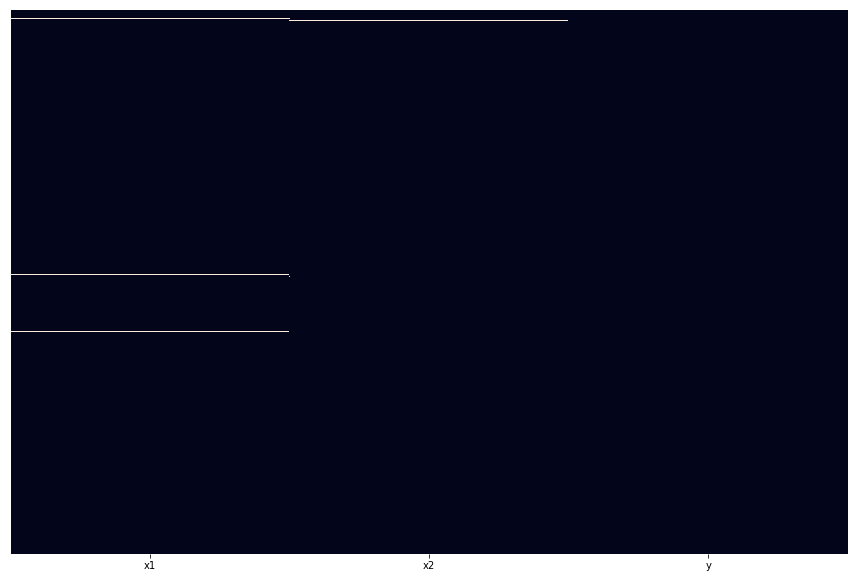

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### Observation:
#### From the above plot I can see that there are few Null values present in this data.

In [8]:
# sum of null values in all the features
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [9]:
# percentage of null values
df.isnull().mean()

x1    0.002245
x2    0.001347
y     0.000000
dtype: float64

In [18]:
#As there are very less amount of Null value present over there hence we can drop that rows
df.dropna(inplace=True)

In [ ]:
#checking if there is any null value present or not
df.isnull().sum()

In [20]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


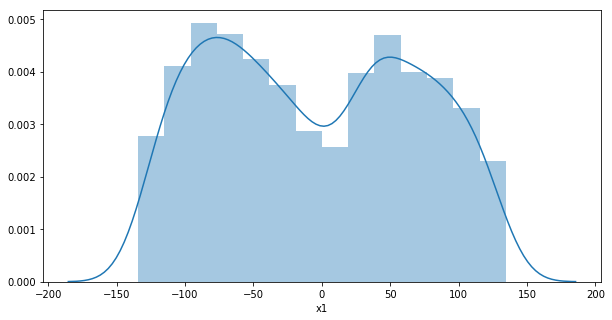

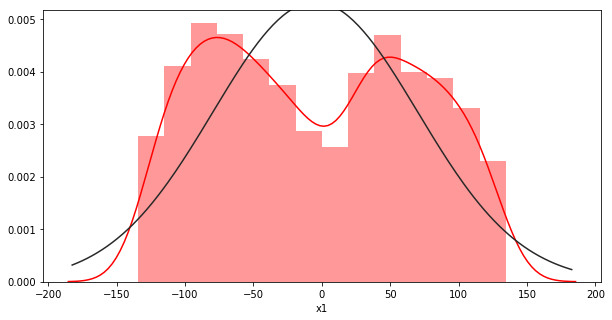

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df['x1'])
plt.show()

plt.figure(figsize=(10,5))
from scipy.stats import norm
sns.distplot(df['x1'], fit=norm , color='r')
plt.show()

## Observation:
###  In the plot 1: The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.
### In the plot 2: The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution with normal distribution curve.


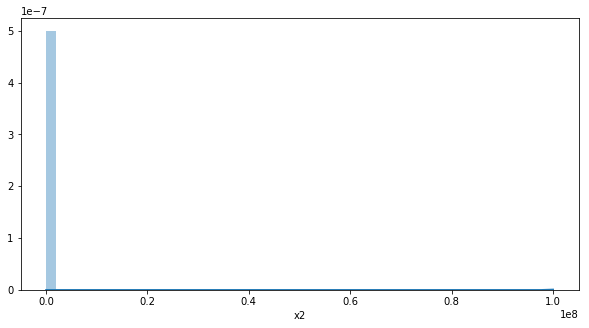

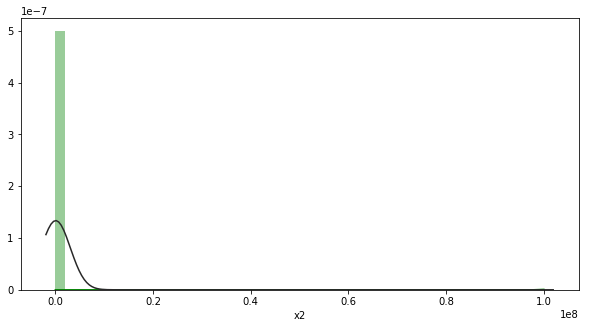

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df['x2'])
plt.show()

plt.figure(figsize=(10,5))
from scipy.stats import norm
sns.distplot(df['x2'], fit=norm , color='g')
plt.show()

## Observation:
###  In the plot 1: The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.
### In the plot 2: The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution with normal distribution curve.

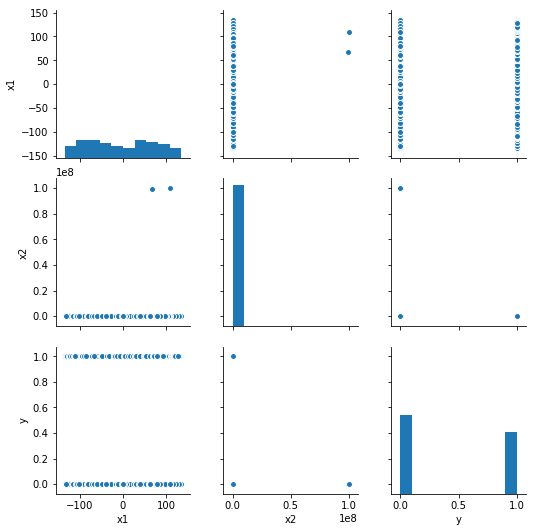

In [28]:
sns.pairplot(data=df)

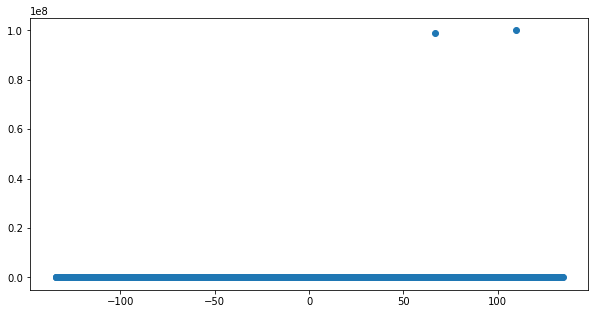

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(df['x1'], df['x2'])

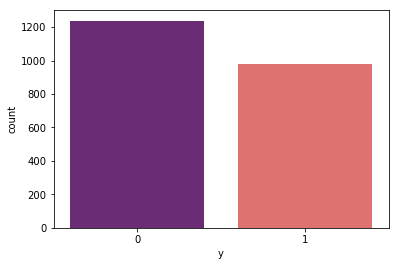

In [121]:
sns.countplot(df['y'],palette="magma")

### Observation:
#### visualize to check the count of 0's and 1's present 

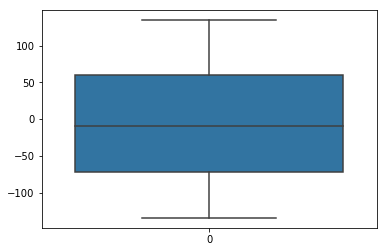

In [38]:
sns.boxplot(data=df['x1'])

### Observation:
#### Boxplot  is mainly used to check is there are any outlier present or not. From the above graph its shows in the feature X1 there are no outlier present.

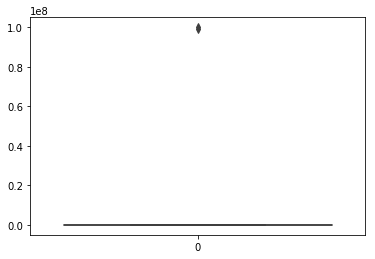

In [39]:
sns.boxplot(data=df['x2'])

### Observation:
#### Boxplot  is mainly used to check is there are any outlier present or not. From the above graph its shows in the feature X2 there are some outlier present.

In [40]:
#some stataical information of the data
df.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [43]:
print('The maximum value of X1 features', df['x1'].max())
print('The maximum value of X2 features', df['x2'].max())
print('The minimum value of X1 features', df['x1'].min())
print('The minimum value of X2 features', df['x2'].min())

The maximum value of X1 features 134.5086874
The maximum value of X2 features 99999999.0
The minimum value of X1 features -134.3691605
The minimum value of X2 features -134.8761321


In [44]:
df.shape

(2219, 3)

In [47]:
df1=df.copy()

In [53]:
Q1_value = df1.quantile(0.25) #25%
Q3_value = df1.quantile(0.75) #75%
IQR_value = Q3 - Q1
print(IQR_value)

x1    131.544509
x2    144.164141
y       1.000000
dtype: float64


In [52]:
print('The unique element present in y feature',df['y'].unique())
print('The number of records present in the dataframe', df1.shape[0])

The unique element present in y feature [1 0]
The number of records present in the dataframe 2219


In [54]:
print((df1 < (Q1_value - 1.5 * IQR_value)) |(df1 > (Q3_value + 1.5 * IQR_value))) #checking the outlier

         x1     x2      y
0     False  False  False
1     False  False  False
2     False  False  False
3     False  False  False
4     False  False  False
5     False  False  False
6     False  False  False
7     False  False  False
8     False  False  False
9     False  False  False
10    False  False  False
11    False  False  False
12    False  False  False
13    False  False  False
14    False  False  False
15    False  False  False
16    False  False  False
17    False  False  False
18    False  False  False
19    False  False  False
20    False  False  False
21    False  False  False
22    False  False  False
23    False  False  False
24    False  False  False
25    False  False  False
26    False  False  False
27    False  False  False
28    False  False  False
29    False  False  False
...     ...    ...    ...
2197  False  False  False
2198  False  False  False
2199  False  False  False
2200  False  False  False
2201  False  False  False
2202  False  False  False
2203  False 

In [55]:
#removing the outlier from the data
df1_remove_outlier = df1[~((df1 < (Q1_value - 1.5 * IQR_value)) |(df1 > (Q3_value + 1.5 * IQR_value))).any(axis=1)]
df1_remove_outlier.shape

(2217, 3)

In [57]:
print('The number of records present before removing the outlier', df.shape[0])
print('The number of records present after removing the outlier', df1_remove_outlier.shape[0])

The number of records present before removing the outlier 2219
The number of records present after removing the outlier 2217


In [63]:
#splitting the dependent and independent features
x=df1.drop('y', axis='columns')
Y=df1['y']

In [64]:
x.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [66]:
Y[:5]

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [69]:
#Normalising the data
from sklearn.preprocessing import Normalizer
n=Normalizer()
X=n.fit_transform(x)

In [71]:
X[:5]

array([[-0.72015645,  0.69381171],
       [-0.71884844,  0.69516683],
       [-0.77344488,  0.63386357],
       [-0.74988138,  0.66157231],
       [-0.72015645,  0.69381171]])

In [72]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

In [73]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape  


((1775, 2), (444, 2), (1775,), (444,))

In [78]:
print(y_train.unique())
print(y_train.value_counts())

[1 0]
0    981
1    794
Name: y, dtype: int64


In [79]:
print(y_test.unique())
print(y_test.value_counts())

[0 1]
0    257
1    187
Name: y, dtype: int64


## Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
model_DT.score(X_test,y_test)

0.8873873873873874

## Decision Tree Classifier hyperparameter tunning

In [82]:
model_DT=DecisionTreeClassifier(criterion='entropy')
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
model_DT.score(X_test,y_test)

0.8896396396396397

## KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [86]:
pred = knn.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(knn.score(X_test,y_test))

[[227  30]
 [ 21 166]]
             precision    recall  f1-score   support

          0       0.92      0.88      0.90       257
          1       0.85      0.89      0.87       187

avg / total       0.89      0.89      0.89       444

0.8851351351351351


### When K=1 the accuracy is 88%. 

In [101]:
KNN_error_rate = []
import numpy as np
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    KNN_error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

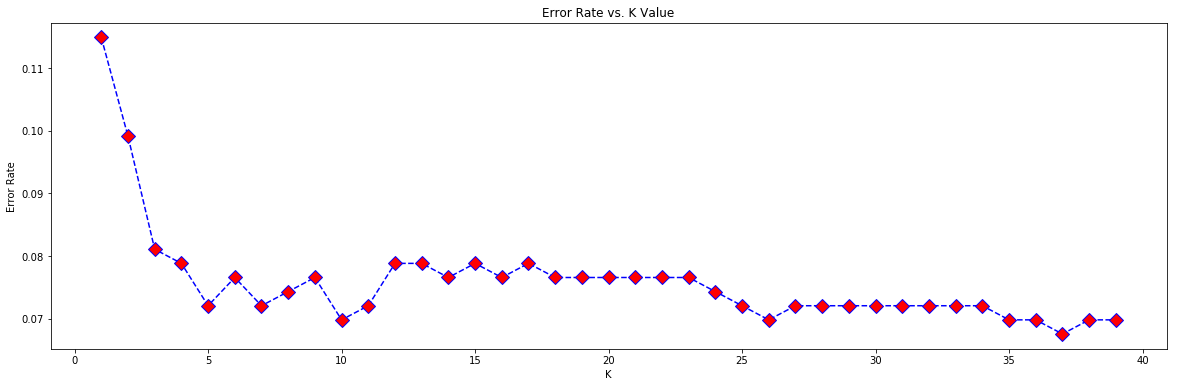

In [102]:
plt.figure(figsize=(20,6))
plt.plot(range(1,40),KNN_error_rate,color='blue', linestyle='dashed', marker='D',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Here the error rate is minimum when k=37. Therefore when the K value is equal to 37 the model will play the best role.

In [100]:

knn = KNeighborsClassifier(n_neighbors=37)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=37')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(knn.score(X_test,y_test))

WITH K=37


[[242  15]
 [ 15 172]]


             precision    recall  f1-score   support

          0       0.94      0.94      0.94       257
          1       0.92      0.92      0.92       187

avg / total       0.93      0.93      0.93       444



0.9324324324324325


### Now when K=37 the accuracy is 93% , hence the accuracy increases from the value when K=1

## SVM

In [103]:
from sklearn.svm import SVC
model_SVC=SVC()
model_SVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
model_SVC.score(X_test,y_test)

0.9369369369369369

In [107]:
pred_svc = model_SVC.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred_svc))
print('\n')
print(classification_report(y_test,pred_svc))



[[241  16]
 [ 12 175]]


             precision    recall  f1-score   support

          0       0.95      0.94      0.95       257
          1       0.92      0.94      0.93       187

avg / total       0.94      0.94      0.94       444



In [110]:
model_SVC_h=SVC(kernel='linear')
model_SVC_h.fit(X_train,y_train)

model_SVC_h.score(X_test,y_test)

0.7612612612612613

In [111]:
pred_svc_h = model_SVC_h.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred_svc_h))
print('\n')
print(classification_report(y_test,pred_svc_h))



[[247  10]
 [ 96  91]]


             precision    recall  f1-score   support

          0       0.72      0.96      0.82       257
          1       0.90      0.49      0.63       187

avg / total       0.80      0.76      0.74       444



## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
model_Lr=LogisticRegression()
model_Lr.fit(X_train,y_train)
model_Lr.score(X_test,y_test)

0.6396396396396397

In [113]:
pred_Lr = model_Lr.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred_Lr))
print('\n')
print(classification_report(y_test,pred_Lr))



[[192  65]
 [ 95  92]]


             precision    recall  f1-score   support

          0       0.67      0.75      0.71       257
          1       0.59      0.49      0.53       187

avg / total       0.63      0.64      0.63       444



### Applying Cross Validation and Grid Search CV

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,25,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [100,10,50,20,1,0.1,0.01]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[2,4,6,8,10,12]
        }
    }
}


In [116]:
scores_value = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores_value.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1_score = pd.DataFrame(scores_value,columns=['model','best_score','best_params'])
df1_score

,model,best_score,best_params
0,svm,0.955493,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.932394,{'n_estimators': 5}
2,logistic_regression,0.712676,{'C': 0.01}
3,decision_tree,0.950986,"{'criterion': 'gini', 'max_depth': 4}"


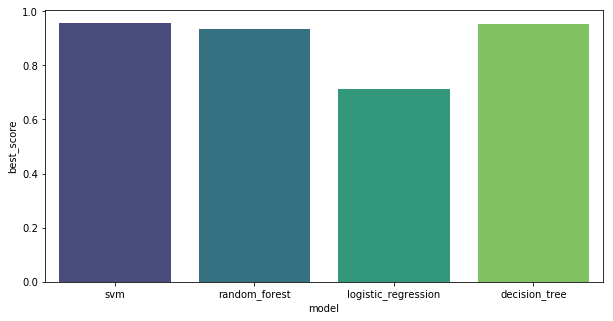

In [119]:
plt.figure(figsize=(10,5))
sns.barplot(data=df1_score, x='model', y='best_score', palette="viridis")

## Hence from the above graph we can conclude thar Support Vector Machine Plays the best with accuracy score 0.955493 which is equals  to 95%.